**Importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**loading in-built dataset using seaborn**

In [ ]:
data = sns.load_dataset('titanic')

**checking dimensions**

In [ ]:
data.shape

(891, 15)

In [ ]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


#**Data Preprocessing**

In [ ]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

**Handling missing values**

In [ ]:
data['age'] = data['age'].fillna(np.mean(data['age']))
data['deck'] = data['deck'].fillna(data['deck'].mode()[0])
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])
data['embark_town'] = data['embark_town'].fillna(data['embark_town'].mode()[0])

In [ ]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

#**Data Visualisation**

**Visualizing the given dataset to find patterns in the data.**

<Axes: xlabel='survived', ylabel='count'>

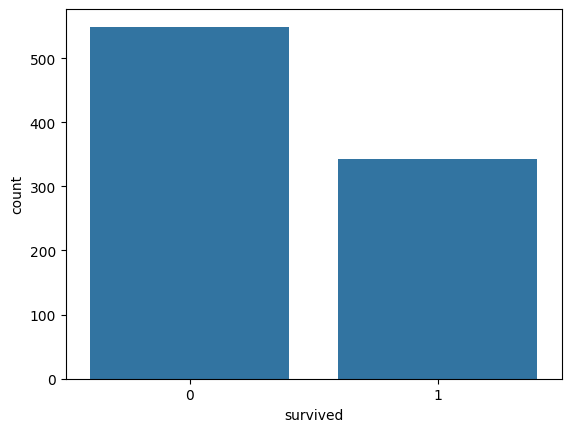

In [ ]:
sns.countplot(data=data,x='survived')

<Axes: xlabel='pclass', ylabel='count'>

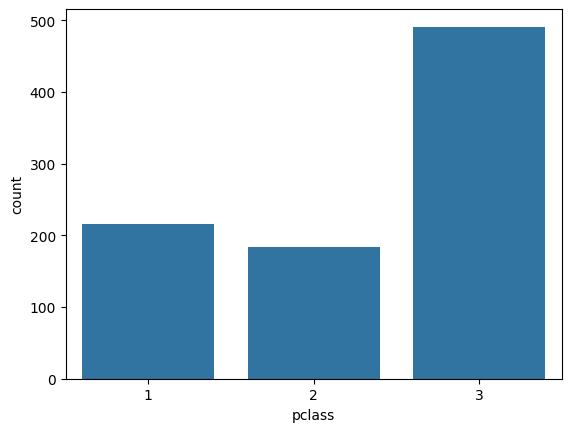

In [ ]:
sns.countplot(data=data,x='pclass')

<Axes: ylabel='age'>

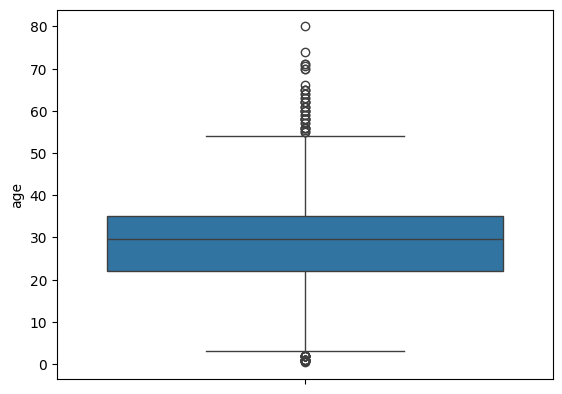

In [ ]:
sns.boxplot(data['age'])

<Axes: ylabel='fare'>

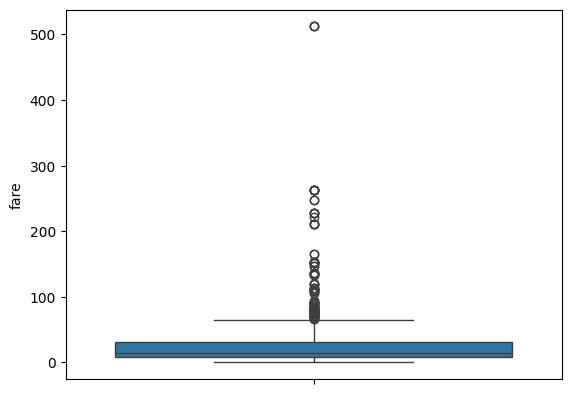

In [ ]:
sns.boxplot(data['fare'])

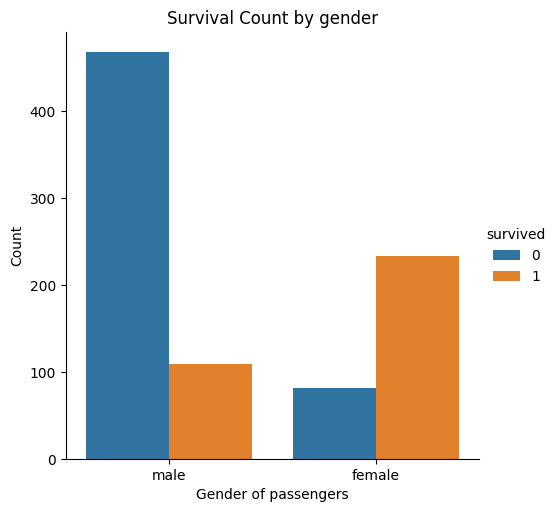

In [ ]:
sns.catplot(x = "sex", hue = "survived", kind = "count", data = data)
plt.title('Survival Count by gender')
plt.xlabel('Gender of passengers')
plt.ylabel('Count')
plt.show()

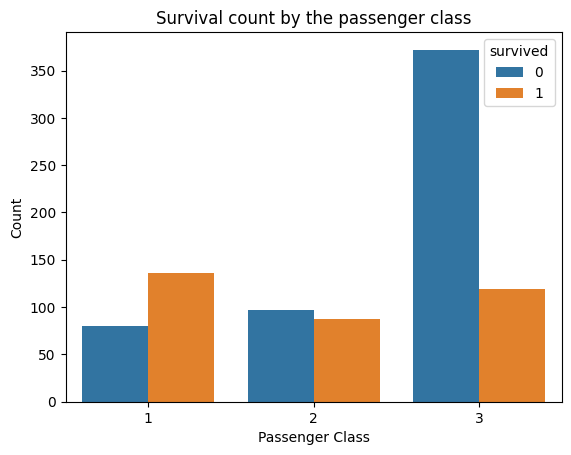

In [ ]:
sns.countplot(x = 'pclass', hue = 'survived', data = data)
plt.title('Survival count by the passenger class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Number of passengers in each class')

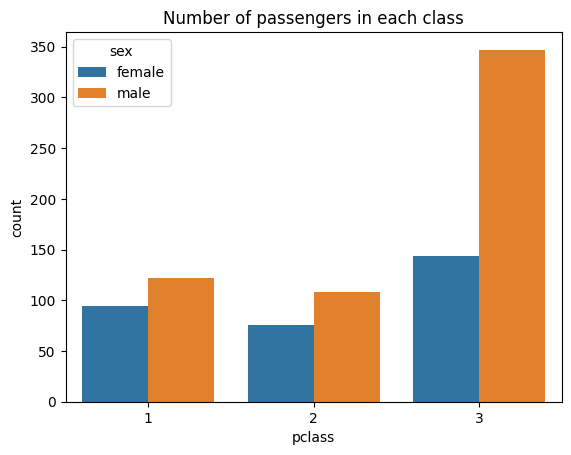

In [ ]:
sns.countplot(data = data, x = 'pclass', hue = 'sex')
plt.title('Number of passengers in each class')

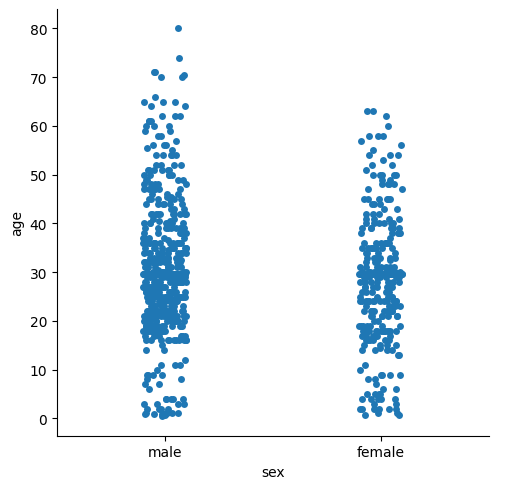

In [ ]:
sns.catplot(x = "sex", y = "age", data = data)

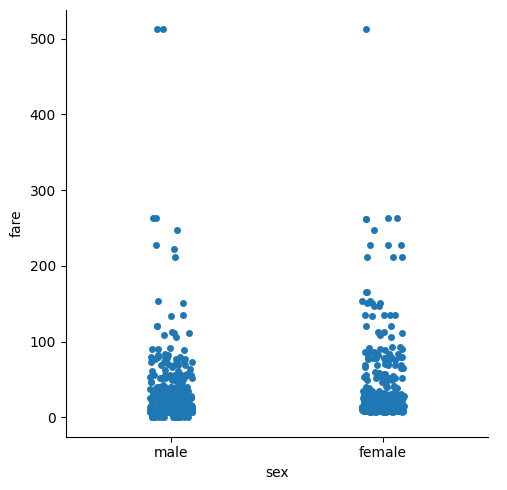

In [ ]:
sns.catplot(x = 'sex', y = 'fare', data = data)

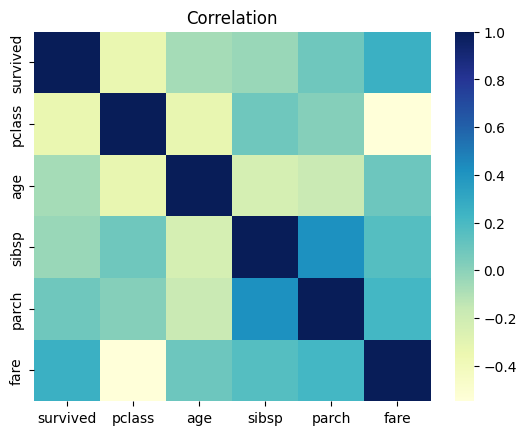

In [ ]:
num = data.select_dtypes(include=['number'])
tc = num.corr()
sns.heatmap(tc, cmap = "YlGnBu")
plt.title('Correlation')
plt.show()

**Checking how price of ticket for each passenger is distributed.**

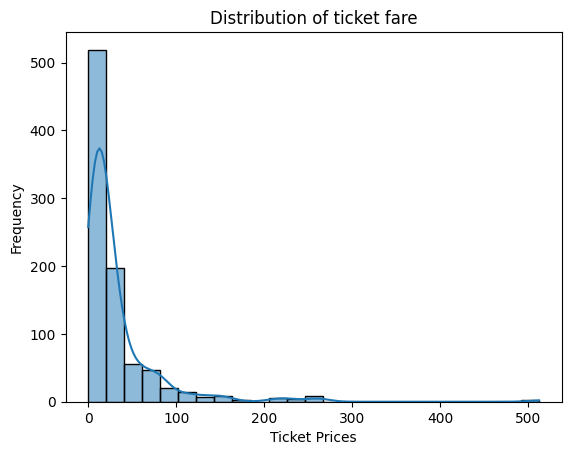

In [ ]:
sns.histplot(data['fare'],bins=25, kde=True)
plt.title('Distribution of ticket fare')
plt.xlabel('Ticket Prices')
plt.ylabel('Frequency')
plt.show()